In [1]:
# This notebook aims to undertand the effect of dropping trees in GBM model on the performance

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

In [3]:
# iplementation of sigmoid function for loss computation 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
''' make_hastie_10_2: make a dataset '''

' make_hastie_10_2: make a dataset '

In [5]:
X, y = make_hastie_10_2(n_samples=10000, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [6]:
clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
print("Test logloss: {}".format(log_loss(y_test, y_pred)))

Test logloss: 0.15012705293355158


In [7]:
def compute_loss(y_true, scores_pred):
    '''
        Since we use raw scores we will wrap log_loss 
        and apply sigmoid to our predictions before computing log_loss itself
    '''
    return log_loss(y_true, sigmoid(scores_pred))
    
'''
    Get cummulative sum of *decision function* for trees. i-th element is a sum of trees 0...i-1.
    We cannot use staged_predict_proba, since we want to maniputate raw scores
    (not probabilities). And only in the end convert the scores to probabilities using sigmoid
'''
cum_preds = np.array([x for x in clf.staged_decision_function(X_test)])[:, :, 0] 

print ("Logloss using all trees:           {}".format(compute_loss(y_test, cum_preds[-1, :])))
print ("Logloss using all trees but last:  {}".format(compute_loss(y_test, cum_preds[-2, :])))
print ("Logloss using all trees but first: {}".format(compute_loss(y_test, cum_preds[-1, :] - cum_preds[0, :])))

Logloss using all trees:           0.15012705293355158
Logloss using all trees but last:  0.15013773126717803
Logloss using all trees but first: 0.1500767287815608


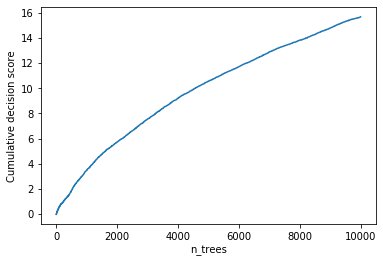

In [8]:
plt.plot(cum_preds[:, y_test == 1][:, 0])

plt.xlabel('n_trees')
plt.ylabel('Cumulative decision score');